In [3]:
import pandas as pd

filename_data = "weather_prediction_dataset_light.csv"
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [5]:
data.shape

(3654, 91)

In [6]:
import string 
print({x.lstrip(string.ascii_uppercase + "_") for x in data.columns if x not in ["MONTH", "DATE"]})

{'precipitation', 'temp_mean', 'humidity', 'temp_min', 'temp_max', 'global_radiation', 'cloud_cover', 'pressure', 'sunshine'}


<Axes: xlabel='Day', ylabel='Basel sunchine hours'>

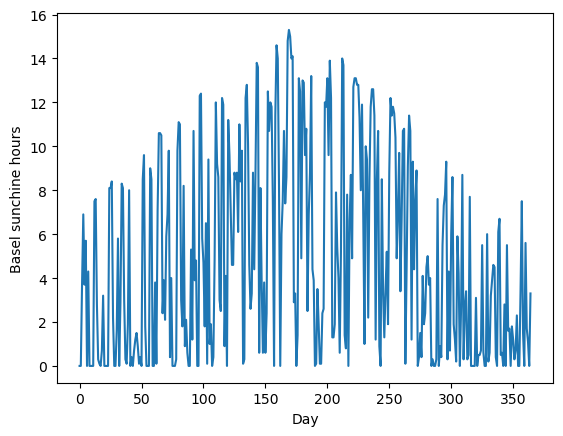

In [7]:
data.iloc[:365]['BASEL_sunshine'].plot(xlabel="Day",ylabel="Basel sunchine hours")

In [8]:
nr_rows = 365*9
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]
cols = [c for c in X_data.columns if c[:5] == 'BASEL']
X_data = X_data[cols]

In [9]:
X_data

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
...,...,...,...,...,...,...,...,...,...
3281,7,0.79,1.0278,0.23,0.00,0.7,3.3,1.7,5.2
3282,1,0.55,1.0296,0.62,0.00,7.0,0.5,-1.2,2.8
3283,8,0.68,1.0312,0.22,0.00,0.5,-1.5,-4.0,-0.3
3284,7,0.64,1.0277,0.14,0.00,0.0,-1.3,-4.0,-0.5


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=0)

In [17]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

def create_nn():
    inputs = keras.layers.Input(shape=(X_data.shape[1],), name='input')

    layers_dense = keras.layers.BatchNormalization()(inputs)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="model_batchnorm")

model = create_nn()
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 9)]               0         
                                                                 
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 100)               1000      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,137
Trainable params: 6,119
Non-trainable params: 18
________________________________________________

In [18]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

In [27]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot')  # optional, that's only to define a visual style
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted sunshine hours")
    plt.ylabel("true sunshine hours")
    plt.title(title)

In [28]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

16/16 [==============================] - 0s 846us/step


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )


In [30]:
model = create_nn()
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 9)]               0         
                                                                 
 batch_normalization_3 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 100)               1000      
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,137
Trainable params: 6,119
Non-trainable params: 18
________________________________________________

Epoch 1/1000
72/72 - 1s - loss: 20.4064 - root_mean_squared_error: 4.5173 - val_loss: 23.3054 - val_root_mean_squared_error: 4.8276 - 1s/epoch - 15ms/step
Epoch 2/1000
72/72 - 0s - loss: 12.9646 - root_mean_squared_error: 3.6006 - val_loss: 14.9282 - val_root_mean_squared_error: 3.8637 - 178ms/epoch - 2ms/step
Epoch 3/1000
72/72 - 0s - loss: 12.2917 - root_mean_squared_error: 3.5060 - val_loss: 12.9090 - val_root_mean_squared_error: 3.5929 - 200ms/epoch - 3ms/step
Epoch 4/1000
72/72 - 0s - loss: 12.0469 - root_mean_squared_error: 3.4709 - val_loss: 12.5806 - val_root_mean_squared_error: 3.5469 - 170ms/epoch - 2ms/step
Epoch 5/1000
72/72 - 0s - loss: 11.9202 - root_mean_squared_error: 3.4526 - val_loss: 12.0759 - val_root_mean_squared_error: 3.4750 - 145ms/epoch - 2ms/step
Epoch 6/1000
72/72 - 0s - loss: 11.5951 - root_mean_squared_error: 3.4052 - val_loss: 11.9716 - val_root_mean_squared_error: 3.4600 - 178ms/epoch - 2ms/step
Epoch 7/1000
72/72 - 0s - loss: 11.9191 - root_mean_squared_

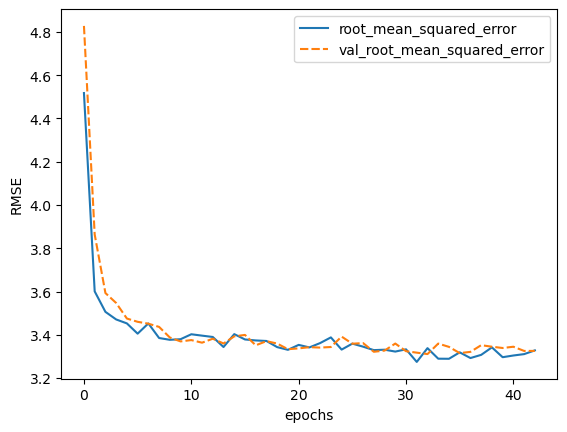

In [31]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])

16/16 [==============================] - 0s 1ms/step


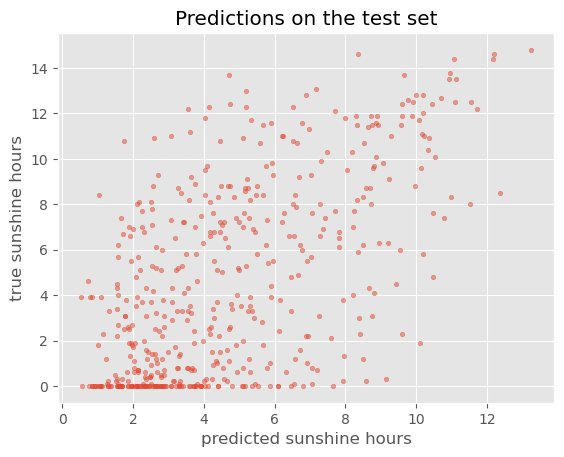

In [32]:
y_test_predicted = model.predict(X_test)
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

In [34]:
from sklearn.metrics import mean_squared_error
y_baseline_prediction = X_test['BASEL_sunshine']
rmse_nn = mean_squared_error(y_test, y_test_predicted, squared=False)
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
print('NN RMSE: {:.2f}, baseline RMSE: {:.2f}'.format(rmse_nn, rmse_baseline))

NN RMSE: 3.39, baseline RMSE: 4.25


In [35]:
model.save('my_tuned_weather_model')

INFO:tensorflow:Assets written to: my_tuned_weather_model\assets


INFO:tensorflow:Assets written to: my_tuned_weather_model\assets
